
## Case Study 4: Clustering Movies
> Today's question: **How can I know what movies are similar without having watched them?**

This notebook shows a limited real-world use case of K-means clustering: namely, given a dataset of movies and their (possibly multiple valid) genres, cluster them with other movies with similar genres. This may be helpful, for example, as a filter to automatically group similar movies together, or as a movie recommendation system.

#### Learning outcomes:
- Clean and preprocess dataset
- Data exploration
    - Pretty plots
    - Interactive plots
    - Choropleth
- One-hot encoding
- Use K-means
    - Use sklear's KMeans class
    - Elbow method
- Analysis of clusters

First, we load the data and do what we usually do when we load data!

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies - tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492342,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816628,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4799 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#Plots

## Seaborn
Seaborn is a python library, often abbreviated as sns (like pd for pandas). The library can be used to generate a variety of graphs and plots and has an extensive list of options for formatting. As this is a new library, let's install it first. You will probably get *Requirement already satisfied* as it is pre-installed in almost any IDE or environment. However, better safe than sorry.



In [ ]:
# TODO
!pip install seaborn

In [ ]:
import seaborn as sns

#Sets the color theme to default, you can change this to get different colours, background colours, and more
sns.reset_defaults()
sns.set_theme()
sns.set(style='white')

Lets see how seaborn and matplotlib.pyplot both make a scatter plot for budget with vote_average.

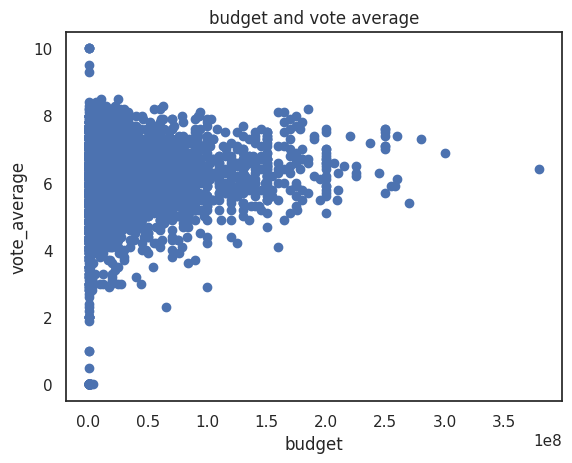

In [ ]:
plt.scatter(df['budget'], df['vote_average'])

# Adding labels and title
plt.xlabel('budget')
plt.ylabel('vote_average')
plt.title('budget and vote average')

# Display the plot
plt.show()

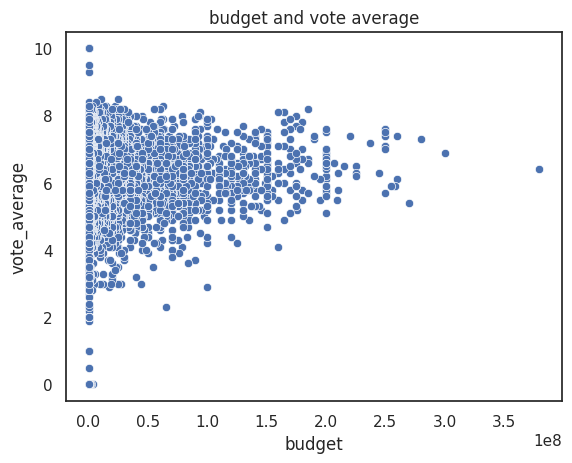

In [ ]:
sns.scatterplot(x='budget', y='vote_average', data=df).set_title('budget and vote average')
plt.show(sns)

They of course look very simmilar since they plot the same data but in seaborn you can see the individual data points a bit more clearly, and it made the axis names for us.

We also see that budget doesn't really lead to a higher vote, which is what you mgiht expect. Budget is of course releated to release_date since a milion euros is a lot more in 1960 then it is today. Lets test if we can also see this in our data, and still look at vote_average.

Before we can make our next plot we have to get some information from our dataset. The next block of code will take the release date and extract the release year form it.

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year into a new column
df['release_year'] = df['release_date'].dt.year

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0


Now lets make our plot with release year and budget on the axis and vote average as a hue.

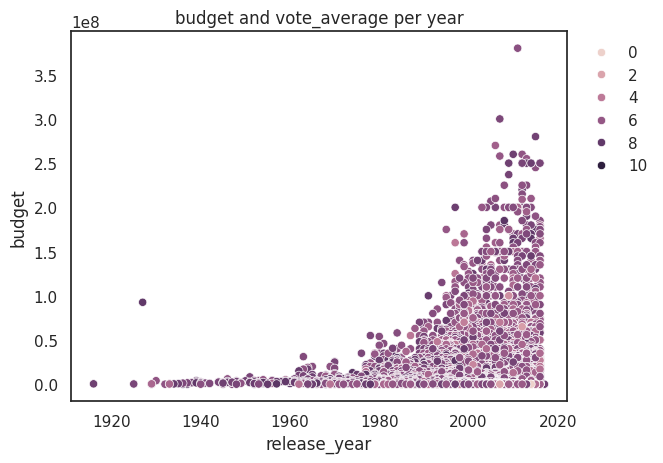

In [ ]:
scat = sns.scatterplot(x='release_year', y='budget', data=df, hue = 'vote_average')
scat.set_title('budget and vote_average per year')
# Move the legend
scat.legend(loc='upper center',bbox_to_anchor=(1.10, 1), ncol=1, frameon=False)
plt.show(scat)

It is a bit hard to see because of so many points but it does seem that within the year the lighter pointss (lower vote) also have a lower budget and that the once with a lot of budget get a high vote.

## Plotly
Ploty is another plotting package. This package also allows for interaction with the plot.

In [ ]:
!pip install plotly_express

In [ ]:
import plotly_express as px

### Recreating our scatter plot
Start with the basics: back to our simple scatter plot and distribution.
Plotly plots are generated as follows:


```
fig = plotly.<plot type>(<parameters>)
```

An extra step is required to view the plot


```
fig.show()
```







In [ ]:
fig = px.scatter(df, x='release_year', y='budget', color='vote_average')
fig.show()

Now if we hover over a data point we get its _release year_, _budget_ and _vote average_. This doesn't make it very easy to understand what move that data point corresponds to. Lets also include the title and the runtime as information.

In [ ]:
fig2d = px.scatter(df,
                 x='release_year',
                 y='budget',
                 color='vote_average',
                 hover_name='title',
                 hover_data=df[['vote_count','runtime']])
fig2d.show()

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0


With plotly we can also plot our data onto a map. First lets pre-process our data so that we can get the country in which the movie was made/released. To do this we must extract the production country from the production countries column.

In [ ]:
def process_pc_string(gs):
    gs = eval(gs)
    if gs:
        return gs[0]['name']
    else:
        return None

# print(df["production_countries"])

df["proc_production_countries"] = df["production_countries"].apply(process_pc_string)

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,proc_production_countries
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,United States of America
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,United Kingdom
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,United States of America
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,United States of America


Lets make a plot that will visualize which country produces the most movies.

In [ ]:
country_counts = df['proc_production_countries'].value_counts()
country_counts_df = pd.DataFrame(country_counts.reset_index())
country_counts_df.columns = ['country', 'count']
# print(country_counts_df)

# Choropleth map
fig = px.choropleth(country_counts_df, locations="country", color='count', locationmode='country names',
                    title='Number of Movies by Country')

fig.show()

Hmm seems that Hollywood makes so many movies that we can't really see the differences between the other countries. We can drop the USA from our country_counts so that we can see the rest.

In [ ]:
country_counts_df = country_counts_df[country_counts_df['country'] != "United States of America"]

fig = px.choropleth(country_counts_df, locations="country", color='count', locationmode='country names',
                    title='Number of Movies by Country')

fig.show()

In the choropleth above it looks like the USA produced no movies, this because we droped this data point.
Can you think of ways that we could still give the USA a colour or make it clear that it has been removed?

#K-means
Now lets talk about clustering, and K-means.

We first should process the strings in the genre column to a list of useful genre names (we don't really care about the ids for now).

In [ ]:
print(df["genres"][0])

def process_genre_string(gs):
    gs = eval(gs)
    gs = [x['name'] for x in gs] # check out list comprehension in Python
    return gs

processed_genres = []

# very useful syntax to iterate over the rows in an arbitrary dataframe
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

df["proc_genres"] = processed_genres

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]


In [ ]:
df[["proc_genres", "title"]]

,proc_genres,title
0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar
1,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End
2,"[Action, Adventure, Crime]",Spectre
3,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises
4,"[Action, Adventure, Science Fiction]",John Carter
...,...,...
4798,"[Action, Crime, Thriller]",El Mariachi
4799,"[Comedy, Romance]",Newlyweds
4800,"[Comedy, Drama, Romance, TV Movie]","Signed, Sealed, Delivered"
4801,[],Shanghai Calling


### A little exploration to understand our data
1. Unique labels?
2. Histogram of genres in dataset?
3. ...?

In [ ]:
all_genres = []
for genres in df["proc_genres"]:
    all_genres += genres
print(all_genres)
print(len(all_genres))
print(set(all_genres))
print(len(set(all_genres)))

['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Adventure', 'Fantasy', 'Action', 'Action', 'Adventure', 'Crime', 'Action', 'Crime', 'Drama', 'Thriller', 'Action', 'Adventure', 'Science Fiction', 'Fantasy', 'Action', 'Adventure', 'Animation', 'Family', 'Action', 'Adventure', 'Science Fiction', 'Adventure', 'Fantasy', 'Family', 'Action', 'Adventure', 'Fantasy', 'Adventure', 'Fantasy', 'Action', 'Science Fiction', 'Adventure', 'Action', 'Thriller', 'Crime', 'Adventure', 'Fantasy', 'Action', 'Action', 'Adventure', 'Western', 'Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Adventure', 'Family', 'Fantasy', 'Science Fiction', 'Action', 'Adventure', 'Adventure', 'Action', 'Fantasy', 'Action', 'Comedy', 'Science Fiction', 'Action', 'Adventure', 'Fantasy', 'Action', 'Adventure', 'Fantasy', 'Action', 'Adventure', 'Adventure', 'Fantasy', 'Adventure', 'Fantasy', 'Adventure', 'Drama', 'Action', 'Drama', 'Romance', 'Thriller', 'Adventure', 'Action', 'Science Fiction', 'Thriller', 'Action

In [ ]:
genre_counts = {genre:all_genres.count(genre) for genre in set(all_genres)} # check out dictionary comprehension in Python
genre_counts

{'History': 197,
 'Crime': 696,
 'War': 144,
 'Animation': 234,
 'Romance': 894,
 'Thriller': 1274,
 'Mystery': 348,
 'Action': 1154,
 'Drama': 2297,
 'Family': 513,
 'Fantasy': 424,
 'Western': 82,
 'Adventure': 790,
 'TV Movie': 8,
 'Horror': 519,
 'Documentary': 110,
 'Foreign': 34,
 'Science Fiction': 535,
 'Music': 185,
 'Comedy': 1722}

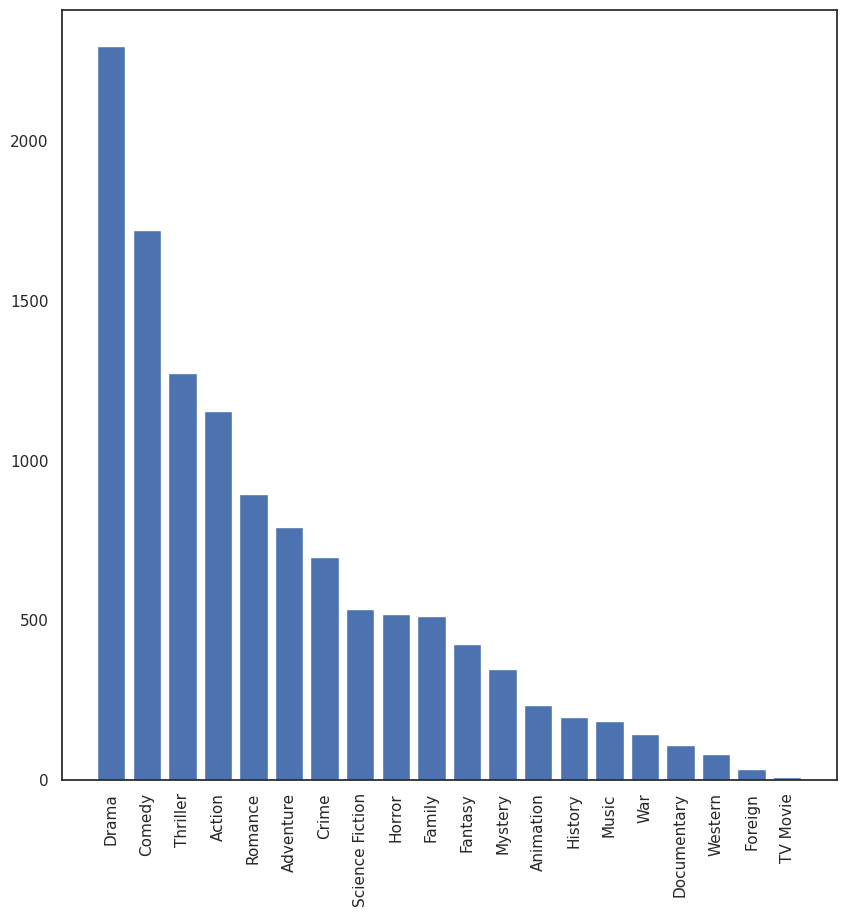

In [ ]:
genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)) # check out sorting in python
xs = list(range(len(genre_counts)))
plt.figure(figsize=(10,10))
plt.bar(xs, genre_counts.values())
plt.xticks(xs, labels=genre_counts.keys(), rotation=90)
plt.show()

#### One-hot encoding

Since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. If $M_3$ is tagged with both $G_1$ and $G_3$, the encoding is $[1,0,1]$. Thus, with these new vectors, we can find similar groupings. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks.

In [ ]:
genres = sorted(genre_counts.keys())

def encode_labels(this_labels, all_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
    """                             # H        A
    out = np.zeros(len(all_labels)) # [1, 0, 0, 1]
    for label in this_labels:
        out[all_labels.index(label)] = 1
    return out

enocded_labels = []
for index, row in df.iterrows():
    enocded_labels.append(encode_labels(row["proc_genres"], genres))

df["encoded_labels"] = enocded_labels

In [ ]:
df['encoded_labels']

,encoded_labels
0,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
1,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,"[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ..."
4,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
4798,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4799,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4800,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4801,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Scikit-Learn's K-Means

Luckily for us, we don't need to implement K-means ourselves -- sklearn has it for us. It is used like this:

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8) # arbitrary choice for now
kmeans = kmeans.fit(df['encoded_labels'].tolist())

How many clusters to choose?
> Q) What method did we just use to find a good choice for a number of clusters?

In [ ]:
distances = []
cluster_sizes = range(1, 50)
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(df['encoded_labels'].tolist())
    distances.append(kmeans.inertia_)

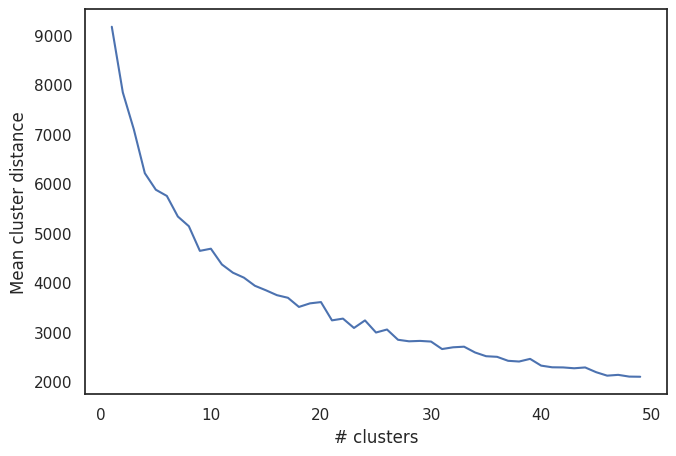

In [ ]:
plt.figure(figsize=(7.5,5))
plt.ylabel("Mean cluster distance")
plt.xlabel("# clusters")

plt.plot(list(cluster_sizes), distances)
plt.show() # elbow rule

We don't seem to have a well-defined 'elbow' here. This is common in real world datasets. There can be a few reasons:
- There are no 'true' or clear groupings
- Euclidean distances may not represent groupings well
- One-hot encoding may not be the best representation
- Any grouping may be good enough, depending on the use case.

A note on the last point: for example, if you wish to create a movie recommender system for a entertainment platform, perhaps a larger grouping may be useful when you have less data about a customer -- more groups will have a larger diversity (in general), and shift to smaller and smaller groupings when you have more data. Perhaps you need an entierly different clustering system entirely -- this is all up to you and your project/research.

For now, we will assume ~14 groups, and print out the clusters of movies. Does this clustering match up with your intuition for similar movies?

> Q) Is 14 a good cluster size? Explore the clusters and see if there are similar that can be merged, or clusters that can be split.

In [ ]:
kmeans = KMeans(14)
kmeans.fit(df['encoded_labels'].tolist())
y_preds = kmeans.predict(df['encoded_labels'].tolist())
df["Cluster"] = y_preds
df.loc[df["Cluster"]==5][["title", "proc_genres"]]

,title,proc_genres
226,How Do You Know,"[Comedy, Drama, Romance]"
323,Sex and the City 2,"[Comedy, Drama, Romance]"
416,Click,"[Comedy, Drama, Fantasy, Romance]"
438,Something's Gotta Give,"[Drama, Comedy, Romance]"
440,Four Christmases,"[Comedy, Romance, Drama]"
...,...,...
4703,Tadpole,"[Comedy, Drama, Romance]"
4749,The Brothers McMullen,"[Comedy, Drama, Romance]"
4752,Tiny Furniture,"[Romance, Comedy, Drama]"
4784,The Puffy Chair,"[Drama, Comedy, Romance]"
